# Supervised Learning - Decision Trees

Decision trees are widely used models for classification and regression. They learn a hierachy of if/else equations, leading to a decision.

### Importing the Modules

We're going to be borrowing alot from `numpy`, `matplotlib`, `pandas`, and the `seaborn` libraries.

In [1]:
import numpy as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Classification trees are essentially a series of questions designed to assign a classification. The image below is a classification tree trained on the Iris dataset from the `sklearn` library.

The Root (brown) and decision (blue) nodes contain questions which split into subnodes. The root is just thye topmost decision node, where you start moving along the tree.

The leaf nodes (green), also called terminal nodes, are nodes that don't split into more nodes. Leaf nodes are where classes are assigned by majority vote.

To use a classification tree, start at a root node (brown), and move along the tree until you reach a leaf (terminal) node.

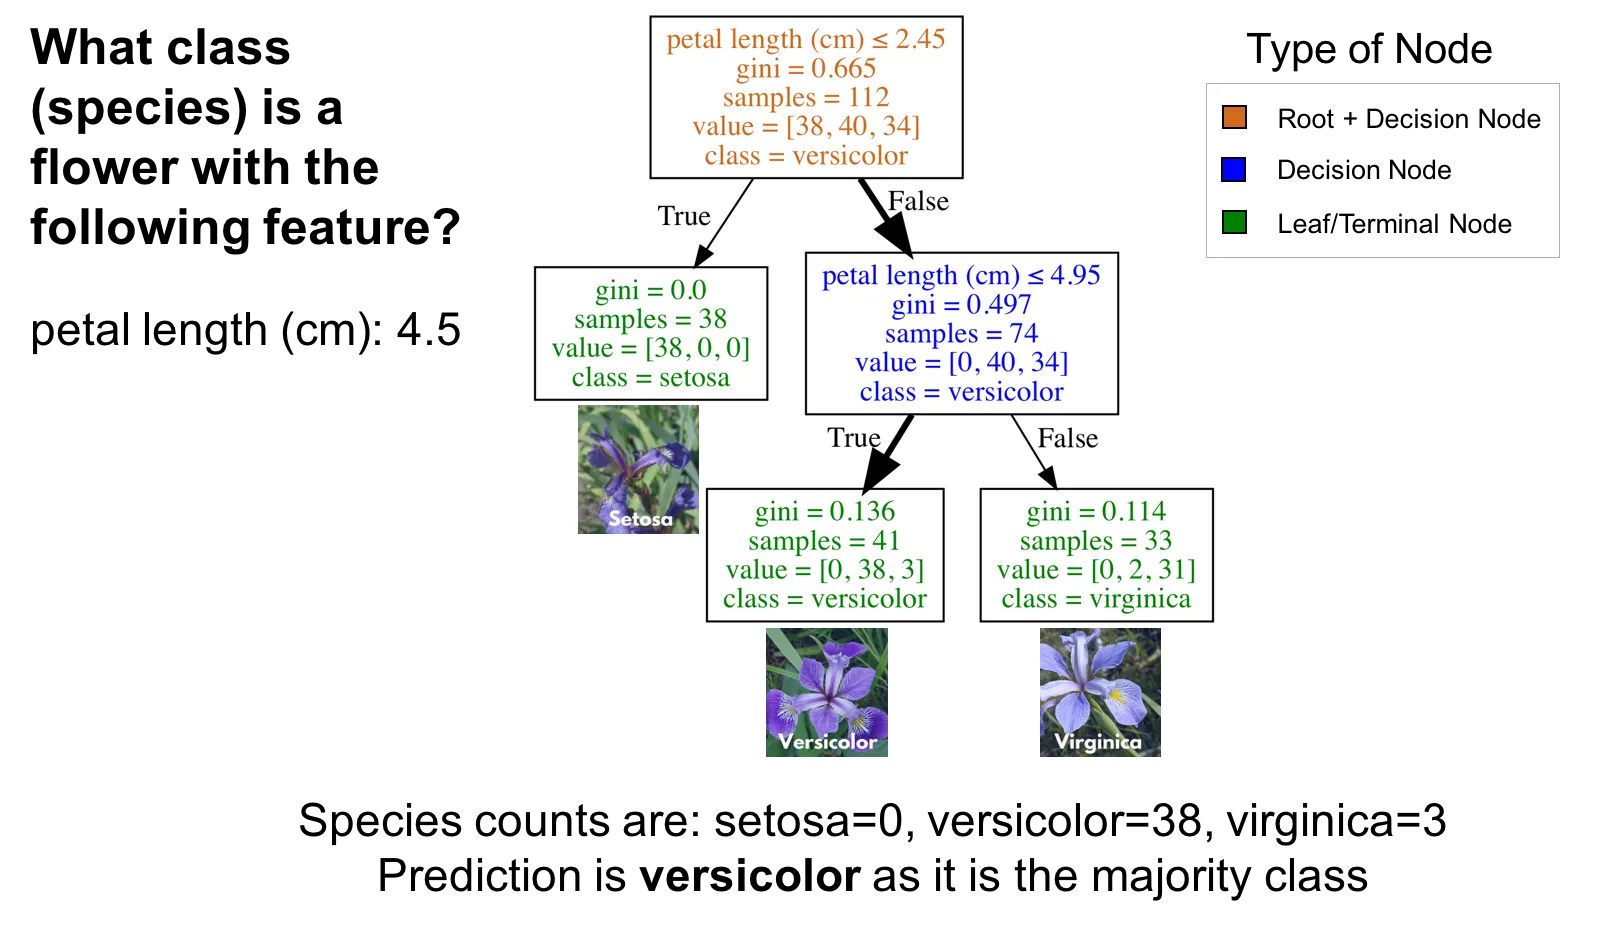

Imagine if you had a flower with a petal length of 4.5 cm and you wanted to classify it. Starting at the root node, you would first ask "Is the petal length (cm) $\leq 2.45$"? The length is greater than 2.45 so that question is False.

Proceed to the next decision node and ask, "Is the petal length (cm) $\leq 4.95$"? This is True so you could predict the flower species as versicolor.

The classification tree learns a sequence of if/then questions with each question involving one feature and one split point. Look at the partial tree below (A), the question, "petal length (cm) $\leq 2.45$" splits the data into two branches based on some value ($2.45$ in this case).

The value between the nodes is called a split point. A good value (one that results in the largest information gain) for a split point is one that does a good job of separating one class from the other.

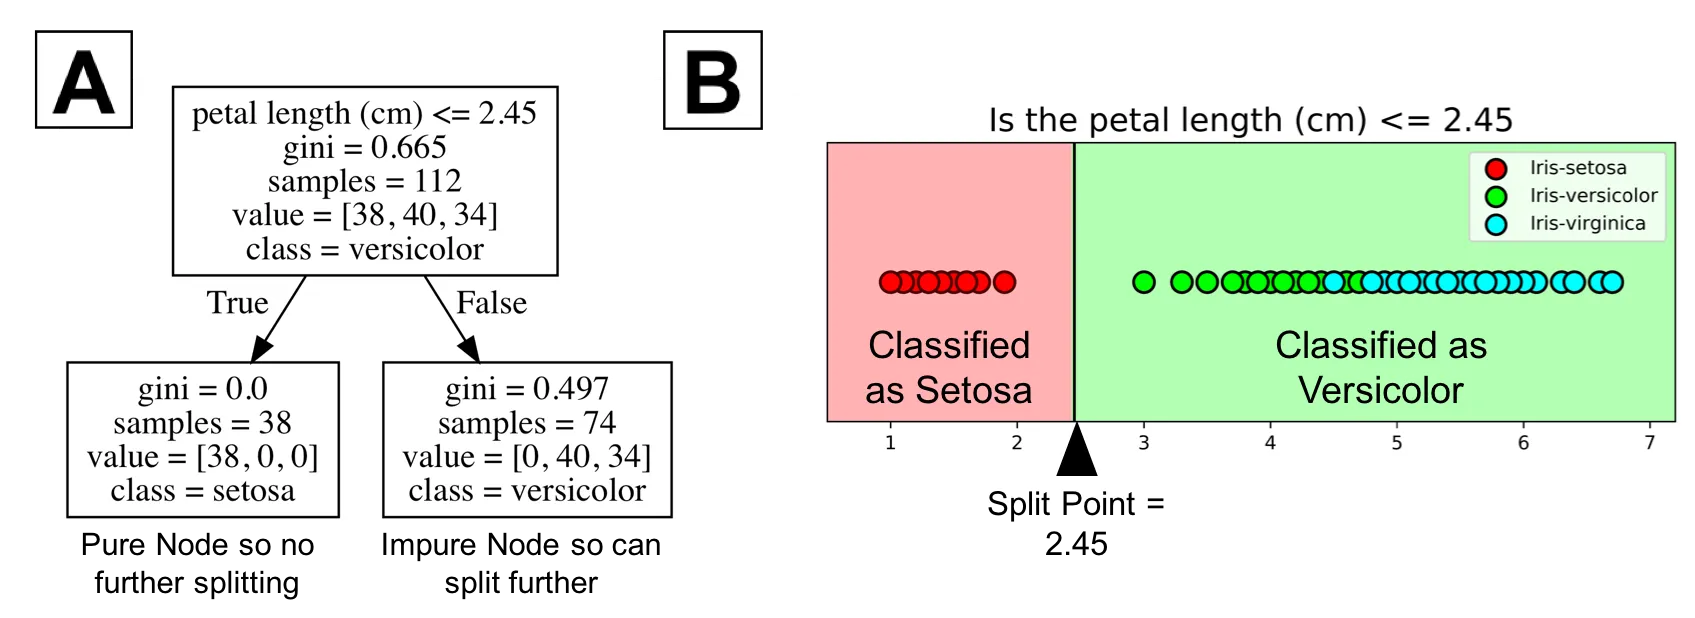

Looking at part B of the figure below, all the points to the left of the split point are classified as setosa while all the points to the right of the split point are classified as versicolor.

Setosa was correctly classified for all 38 points. Since the Setosa is a pure node, the classification tree won't split on this node. However, impure nodes ca split further.

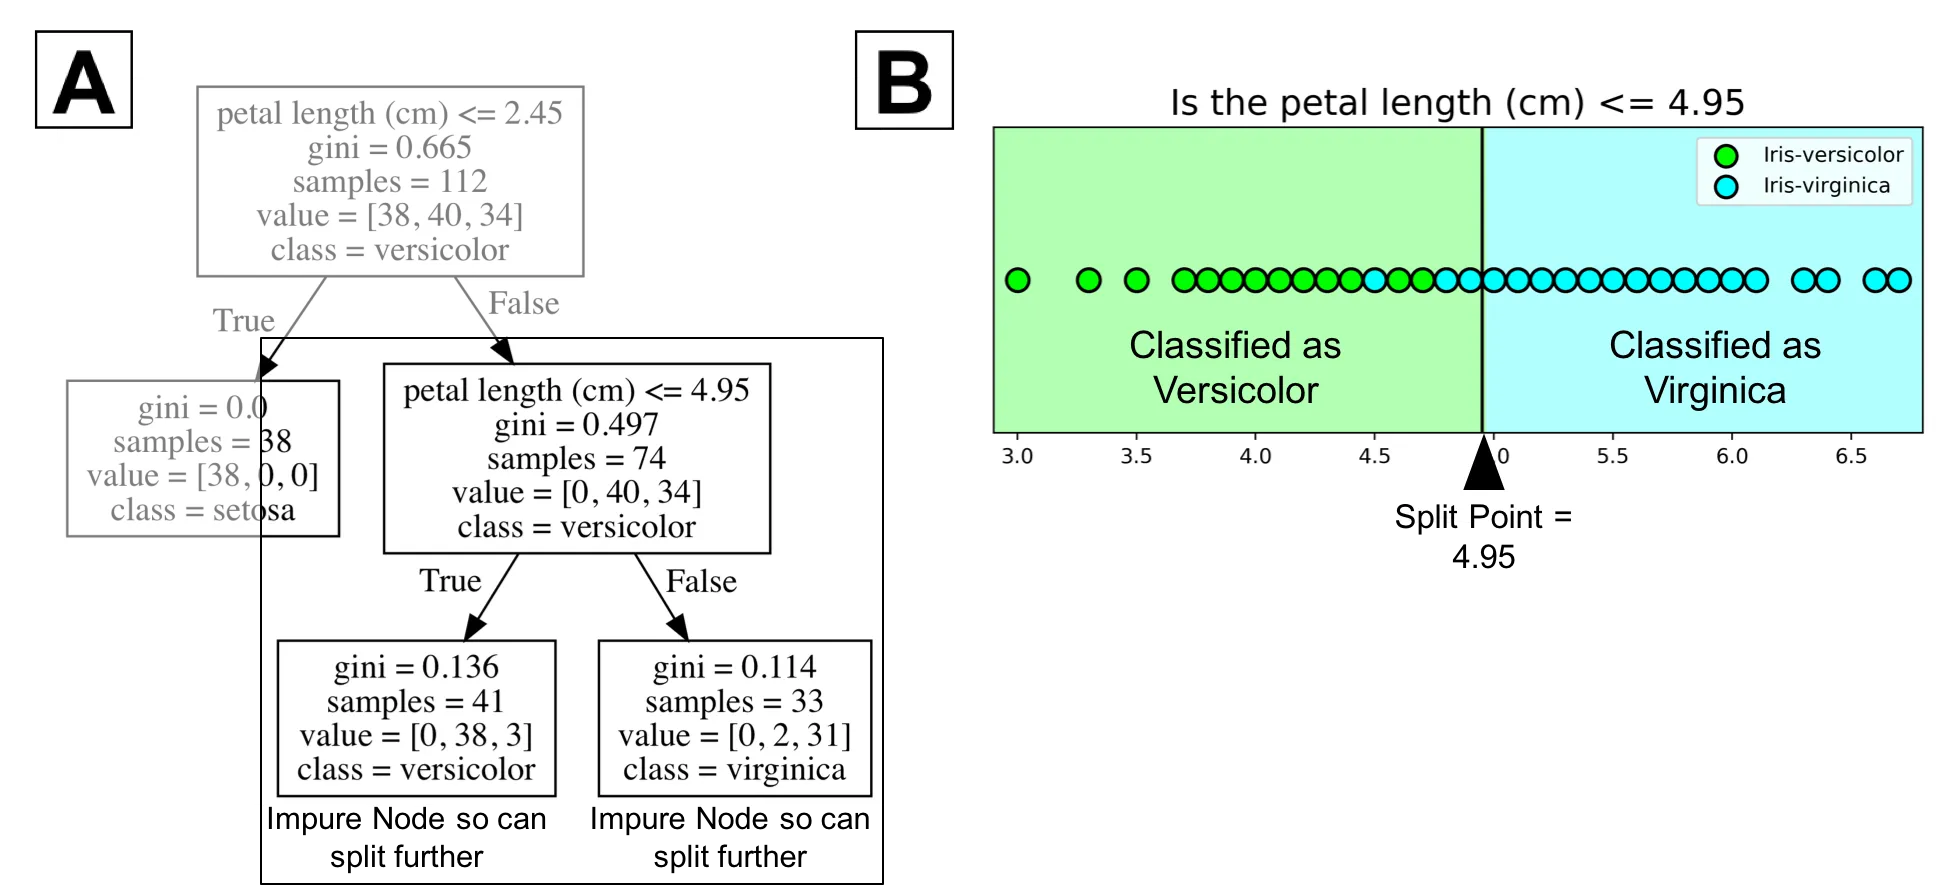

In the image above, the tree has a maximum depth of 2. Tree dephs is a measure of how many splits a tree can make before coming to a prediction. This process will continue until the tree is as pure as possible.

The problem is that this can lead to overfitting. Luckily, most classification models allows us to control for the maximum depth of a tree, which reduces overfitting.

In other words, you can set the maximum depth to stop the growth of th decision tree past a certain depth.

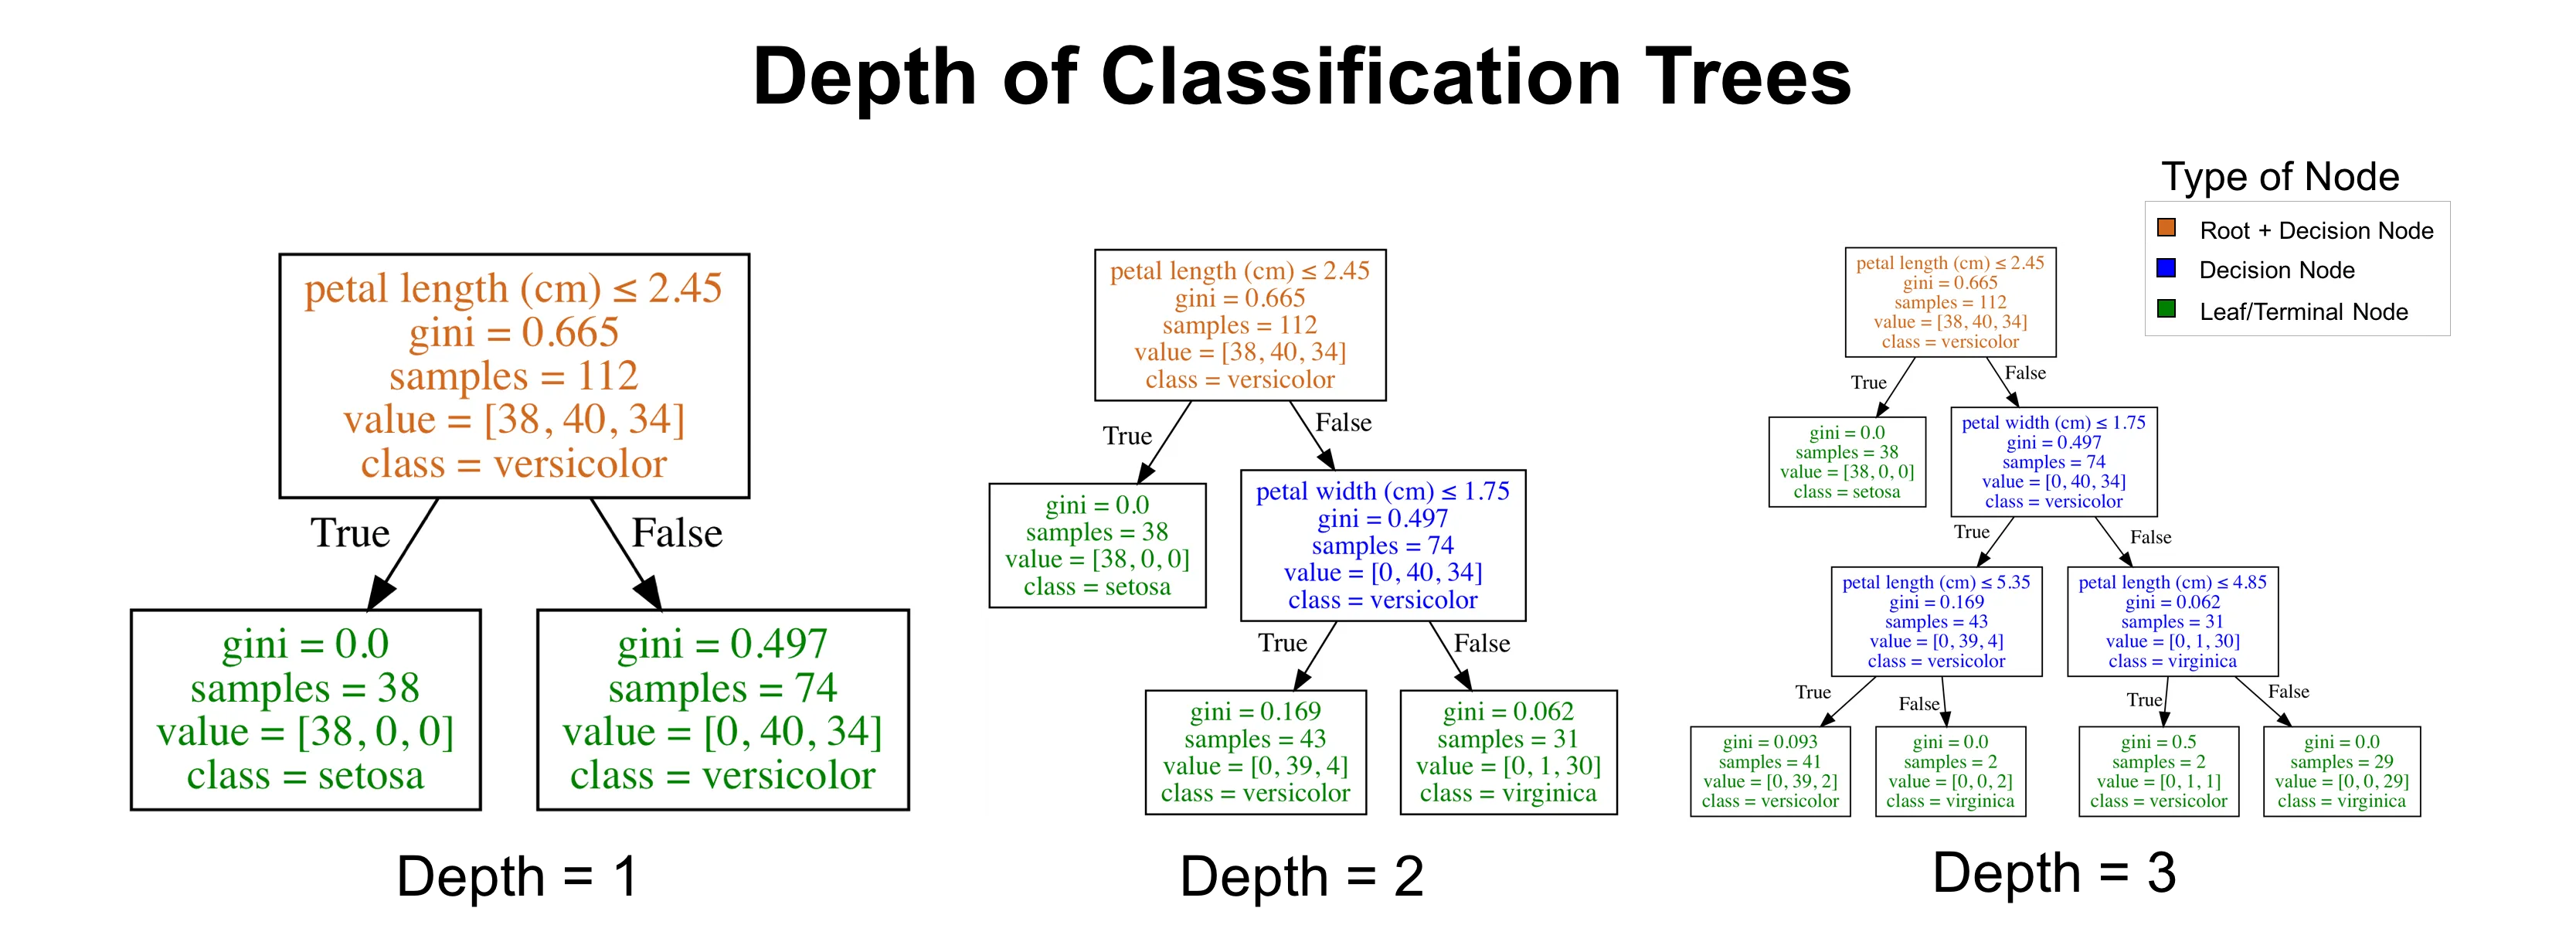

## Loan Repayment Prediction

This project explores publicly available data from LendingClub.com.

Lending Club connects people who need money (borrowers) with people who have money (investors). This project aims to create a model to show profiles of borrowers with a high probability of paying back their loan.

### Importing the Data

The data covers 9,578 loans funded by the platform between May 2007 and February 2010.The interest rate is provided to us for each borrower.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/KidQuant/datasets/main/supervised%20learning_activity_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


We can use the `describe` method to get summary statistics for this datatset.

In [3]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Attributes of Features

The columns in the dataset represent the following:

* `credit.policy`: 1 if the customer meets the credit underwriting criteria of LendingClub.com; 0 otherwise.
* `purpose`: The purpose of the loan.
* `int.rate`: The interest rate of the loan as a percentage.
* `installment`: The monthly installments owed by the borrower if the loan is funded.
* `log.annual.inc`: The natural log of the self-reported annual income of the borrower.
* `dti`: The debt-to-income ratio of the borrower.
* `fico`: The FICO credit score of the borrower.
* `days.with.cr.line`: The number of days the borrower has had a line of credit.
* `revol.bal`: The borrower's revolving balance.
* `revol.util`: The borrower's revolving line utilization rate.
* `inq.last.6mths`: The borrower's number of inquires by creditors in the last 6 months.
* `delinq.2yrs`: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* `pub.rec`: The borrower's number of derogatory public records.

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


There are 13 features and one target variable: `not.fully.paid`. Keep in mind that 1 represents that the loan has not been fully paid; otherwise the label is 0.


## Exploratory Data Analysis

We're going to conduct some EDA based on the featuers and labels of the dataset.

Text(0.5, 0, 'FICO')

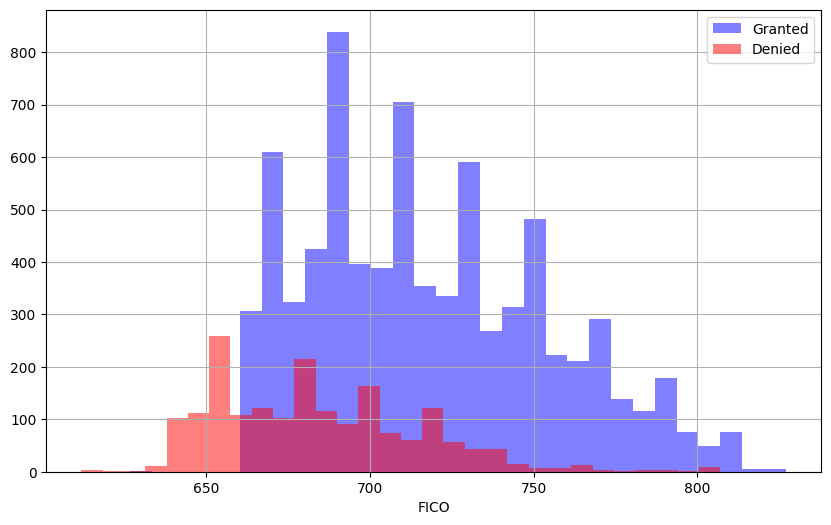

In [5]:
# changing the size of the plot
plt.figure(figsize=(10,6))

#Histogram the FICO scores of people given a loan
df[df['credit.policy'] == 1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='Granted')

# Histogram the FICO scores of people denied a loan
df[df['credit.policy'] == 0]['fico'].hist(alpha=0.5, color = 'red', bins = 30, label='Denied')

# creating a legend
plt.legend()
plt.xlabel('FICO')


Text(0.5, 0, 'FICO')

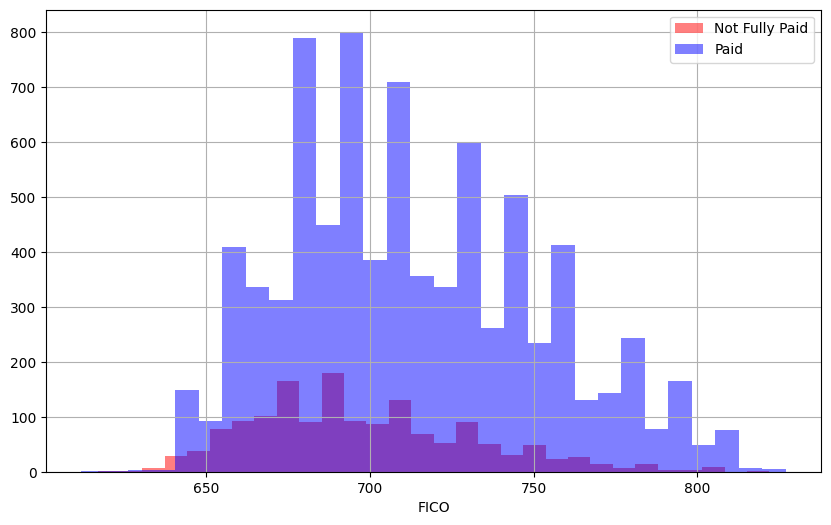

In [6]:
plt.figure(figsize=(10,6))

df[df['not.fully.paid'] == 1]['fico'].hist(alpha = 0.5, color = 'red', bins = 30, label='Not Fully Paid')

df[df['not.fully.paid'] == 0]['fico'].hist(alpha = 0.5, color = 'blue', bins = 30, label = 'Paid')

plt.legend()
plt.xlabel('FICO')

Now we can look at the purpose of all the loans granted, based on whether or not the loans are fully paid. Remember, 1 means that the loan as not fully been paid, while 0 means that the loan was fully paid.

<Axes: xlabel='purpose', ylabel='count'>

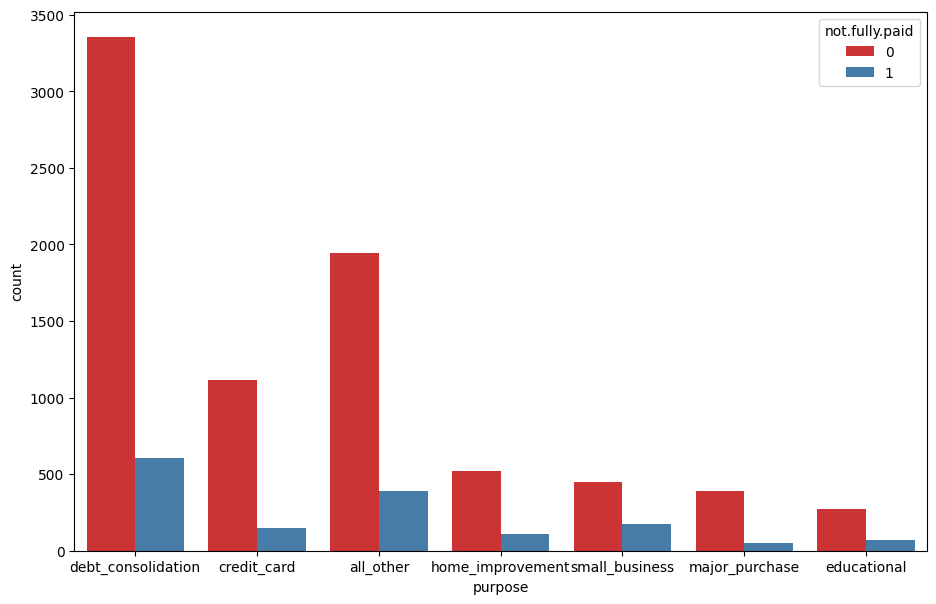

In [7]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose', hue ='not.fully.paid', data = df, palette='Set1')


Now we can create a scatterplot that shows the relationship between the FICO score of a loan receiptent and the interest rate they would be given.

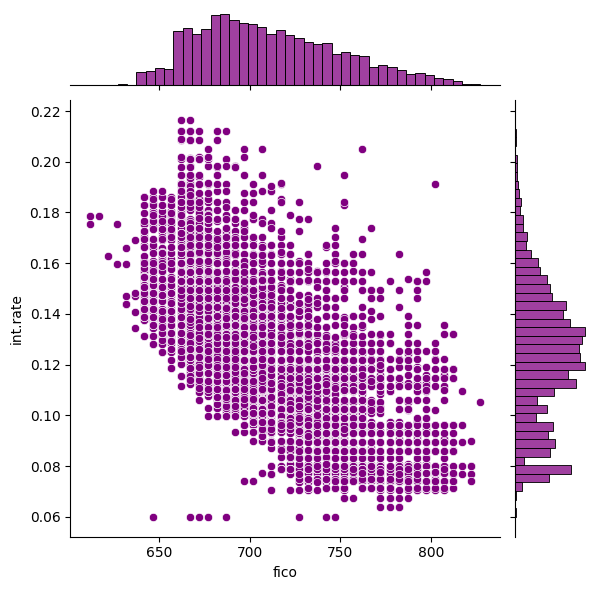

In [8]:
sns.jointplot(x='fico', y='int.rate', data=df, color='purple')

We also have the same chart, except this time it's based on Credit Policy. Recall that 1 represents someone who has been given a loan, while 0 is someone who has been denied a loan.

We can also see the relationship based on who has repaid the loan.

<Figure size 1100x700 with 0 Axes>

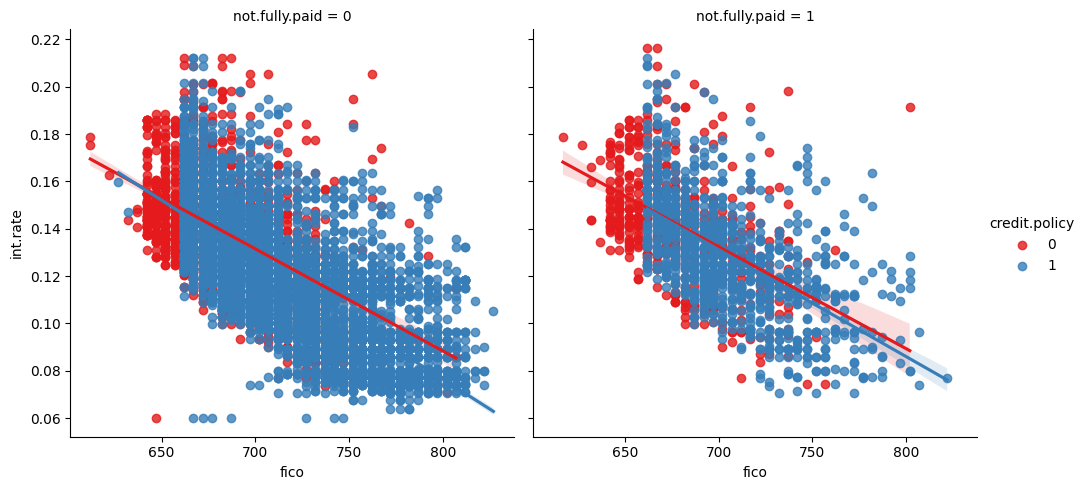

In [9]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

## Setting Up The Data

Let's look at the info of the data again

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Most of our features have numerical values, except for the `purpose` feature. The `.info` shows that it's not a float or int. We need to change that by creating dummy values for the feature.

In [11]:
# changing categorical data to numerical on the 'purpose' column
final_data = pd.get_dummies(df, columns=['purpose'], drop_first=True, dtype=float)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

Now that all of our features are selected and formatted correctly, we can begin training our dataset for machine learning task.

## Train, Test, Split

First, we need to import the `train_test_split` function from the `sklean` module. Once we do that, we need to select our features (we're going to use all of them). Afterwards, we need to select which precentage of the dataset we want to use for testing and training. We'll use 30\% of the dataset for testing.

In [12]:
# Import the sklearn package
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing dataset
# test_size = from 0 to 1 and is the percentage of the data that should be used for testing
# for X drop the target variable
X = final_data.drop('not.fully.paid', axis =1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Decision Tree Classifier Model Fitting

To fit the model using a Decision Tree Classifier, we need to import the `DecisionTreeClassifier` function from `sklearn`, then fit the model on the training data, and use it to make predictions based on the testing data.

In [13]:
# importing the Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

# assigning the model to a variable 'dtree'
dtree = DecisionTreeClassifier(random_state=5)

# training the model
dtree.fit(X_train, y_train)

# making predictions
predictions = dtree.predict(X_test)

## Evaluating The Model

There are many different ways we can evaluate classification models. First, we're going to construct a confusion matrix.

### Confusion Matrix

The confusion matrix is a tool used to evaluate the performance of a model and is visually represented as a table. It providews a deeper layer of insight to data practitoners on the model's performance, errors, and weaknesses. This allows for data scienctist to further analyze their model through fine-tuning.

### The Confusion Matrix Structure

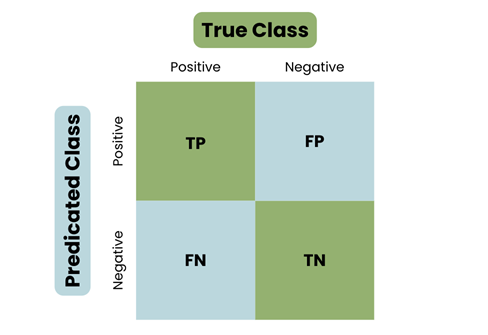

Let's use our model as a basis for the structure.

* **True Positive (TP)** Our model predicted the positive class correctly; identifying someone who repaid their loan.
* **True Negative (TN)** - Our model predicted the negative class correctly; identifying someone who has not repaid their loan.
* **False Positive (FP)** - Our model incorrectly predicted the negative class; identifying someone has repaid their loan as not repaying their loan.
* **False Negative (FN)** - Our model incorrectly predicted the negative class; identifying someone who hasn't repaid their loan as someone who has repaid their loan.



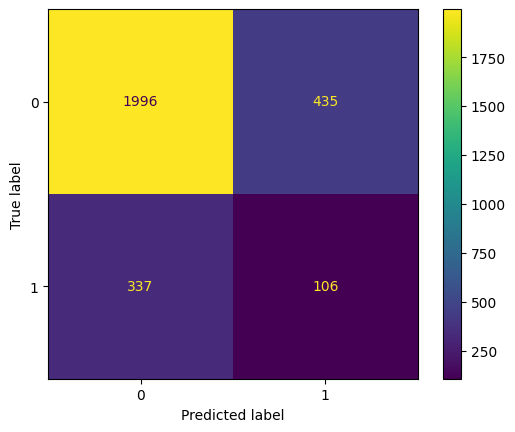

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

confusion_rf = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_rf,
                              display_labels=dtree.classes_)

disp.plot()
plt.show()

As the data shows that more people have repaid their loan than not, it shouldn't be surprising to see that our model correctly identifies that most people are able repay their loan, while very few have failed to repay their loan.

### Getting the Accuracy Score

The **Accuracy** is the measure the total number of correct classifications divided by the total number of classes.

$$
\text{Accuracy}=\frac{TP+TN}{TP+TN+FP+FN}
$$

In [15]:
from sklearn.metrics import accuracy_score

# Accuracy of Decision Trees
dtree_accuracy = accuracy_score(y_test,predictions)
print("Accuracy of Decision Trees")
print(dtree_accuracy)


Accuracy of Decision Trees
0.7313848295059151


According to our model, the model is $~73\%$ accurate. 


When it comes to measuring a model's performance or anything in general, people focus on accuracy. However, being heavily reliant on the accuracy metric can lead to incorrect decisions. As we can see, there are more **false positives** and **false negatives** than **true negatives**.


Let's use other metrics like **Precision** and **Recall** just to see.

### Getting the Precision and Recall Score

**Recall/Sensitivity** measures the total number of true positives divided by the total number of actual positives. **Precision** measures the total number of true positives divided by the total number of predicted positives.

**Specificity** measures the total number of true negatives divided by the total number of actual negatives.

$$
\text{Recall}=\frac{TP}{TP+FN}=\frac{\text{True Positive}}{\text{Actual Results}}
$$

$$
\text{Precision}=\frac{TP}{TP+FP}=\frac{\text{True Positive}}{\text{Predictive Results}}
$$

$$
\text{Specificity}=\frac{TN}{TN+FP}
$$

In [16]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



Our model is very good at classificating borrowers that have repaid their loans, but not borrowers that have failed to repaid their loans. This is not good for identifying borrowers who could potentially default.

### Area Under the ROC Curve (AOC)

Since our dataset is very imbalanced, we should use **AUC**. AUC stands for "Area Under the Curve" in general, and "Area under the Receiver Operating Characteristic Curve" in long form.

It captures the area under the ROC curve and compares the relationship between the **True Positive Rate** (TPR) with the **False Positive Rate** (FPR) across different cut-off thresholds.

* **True Positive Rate (TPR)** - The percentage of correctly predicted positive cases. For example, the portion of correctly predicted loan replayments out of all borrowers who failed to repay their loans.

* **False Positive Rate (FPR)** - The percentage of incorrectly predicted negative cases. For example, the portion of incorrectly predicted loan replayments out of all borrowers who have repaid their loans.

Mathematically, TPR and FPR are expressed as:

$$
\text{TPR}=\frac{TP}{P}=\frac{TP}{TP+FN}
$$
$$
\text{FPR}=\frac{FP}{N}=\frac{FP}{FP+TN}
$$

Now that we understand TPR and FPR by definition, let's understand how they relaate to the AUC metric.

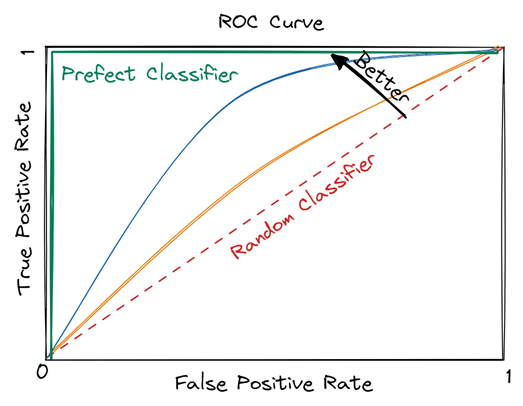

As the chart above shows, the top left corner (high TPs and low FPs) is the desirable state. However, the ideal classifer isn't always possible or achievable in real world applications. So it's important to understand the lower bound of a classifier, which is the red line.

A random classifier has an AUC of 0.5. It's called a random classifier because its predicitions are as good as a random flip of a coin flip.

Basically, a machine learning model's performance lies between a random classifier and the perfect classifier, which means our classifier should perform somewhere between 0.5 and 1, but preferrably, closer to 1 than 0.5.

So now that we know a little more about AUC and how to use it, we can use it for our decision tree model.

### Creating the AUC

We will use the `predict_proba` method, which allows us to create of class of probabilities for each data value. The method accepts a single arugment that corresponds to the data over which the probabilities will be computed. The it returns an array of list containing the class probabilities for the input data points.

The `roc_curve` function calculates all FPR and TPR coodinates and plots the ROC curve, while the `auc` function measures the area under the ROC curve.

Text(0.5, 1.0, 'Random Forest\nAccuracy: 73.14%')

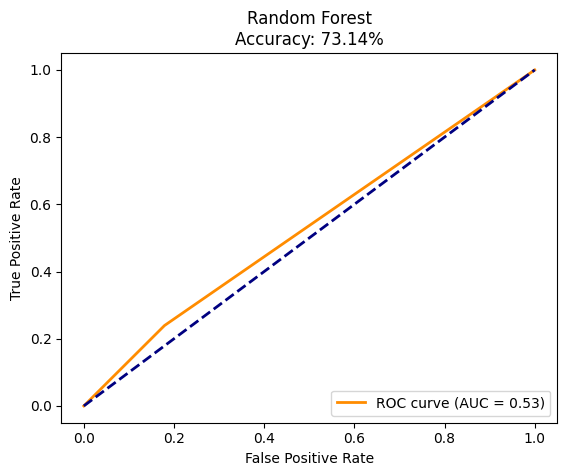

In [17]:
# importing auc and roc_curve for visualizations
from sklearn.metrics import auc, roc_curve

#
y_prob_dt = dtree.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('Random Forest\nAccuracy: {:.2f}%'.format(dtree_accuracy * 100))

Our model's accuracy is $73.14\%$ but the area under the ROC curve is $53\%$. So Decision Trees is probably not a good model for predicting loan repayments. Prehaps we are better off

* Changing our model
* Changing the features (Feature Engineering)
* Tuning the parameters (Hyperparameter Tuning)

## Bonus: Mapping the Decision Tree

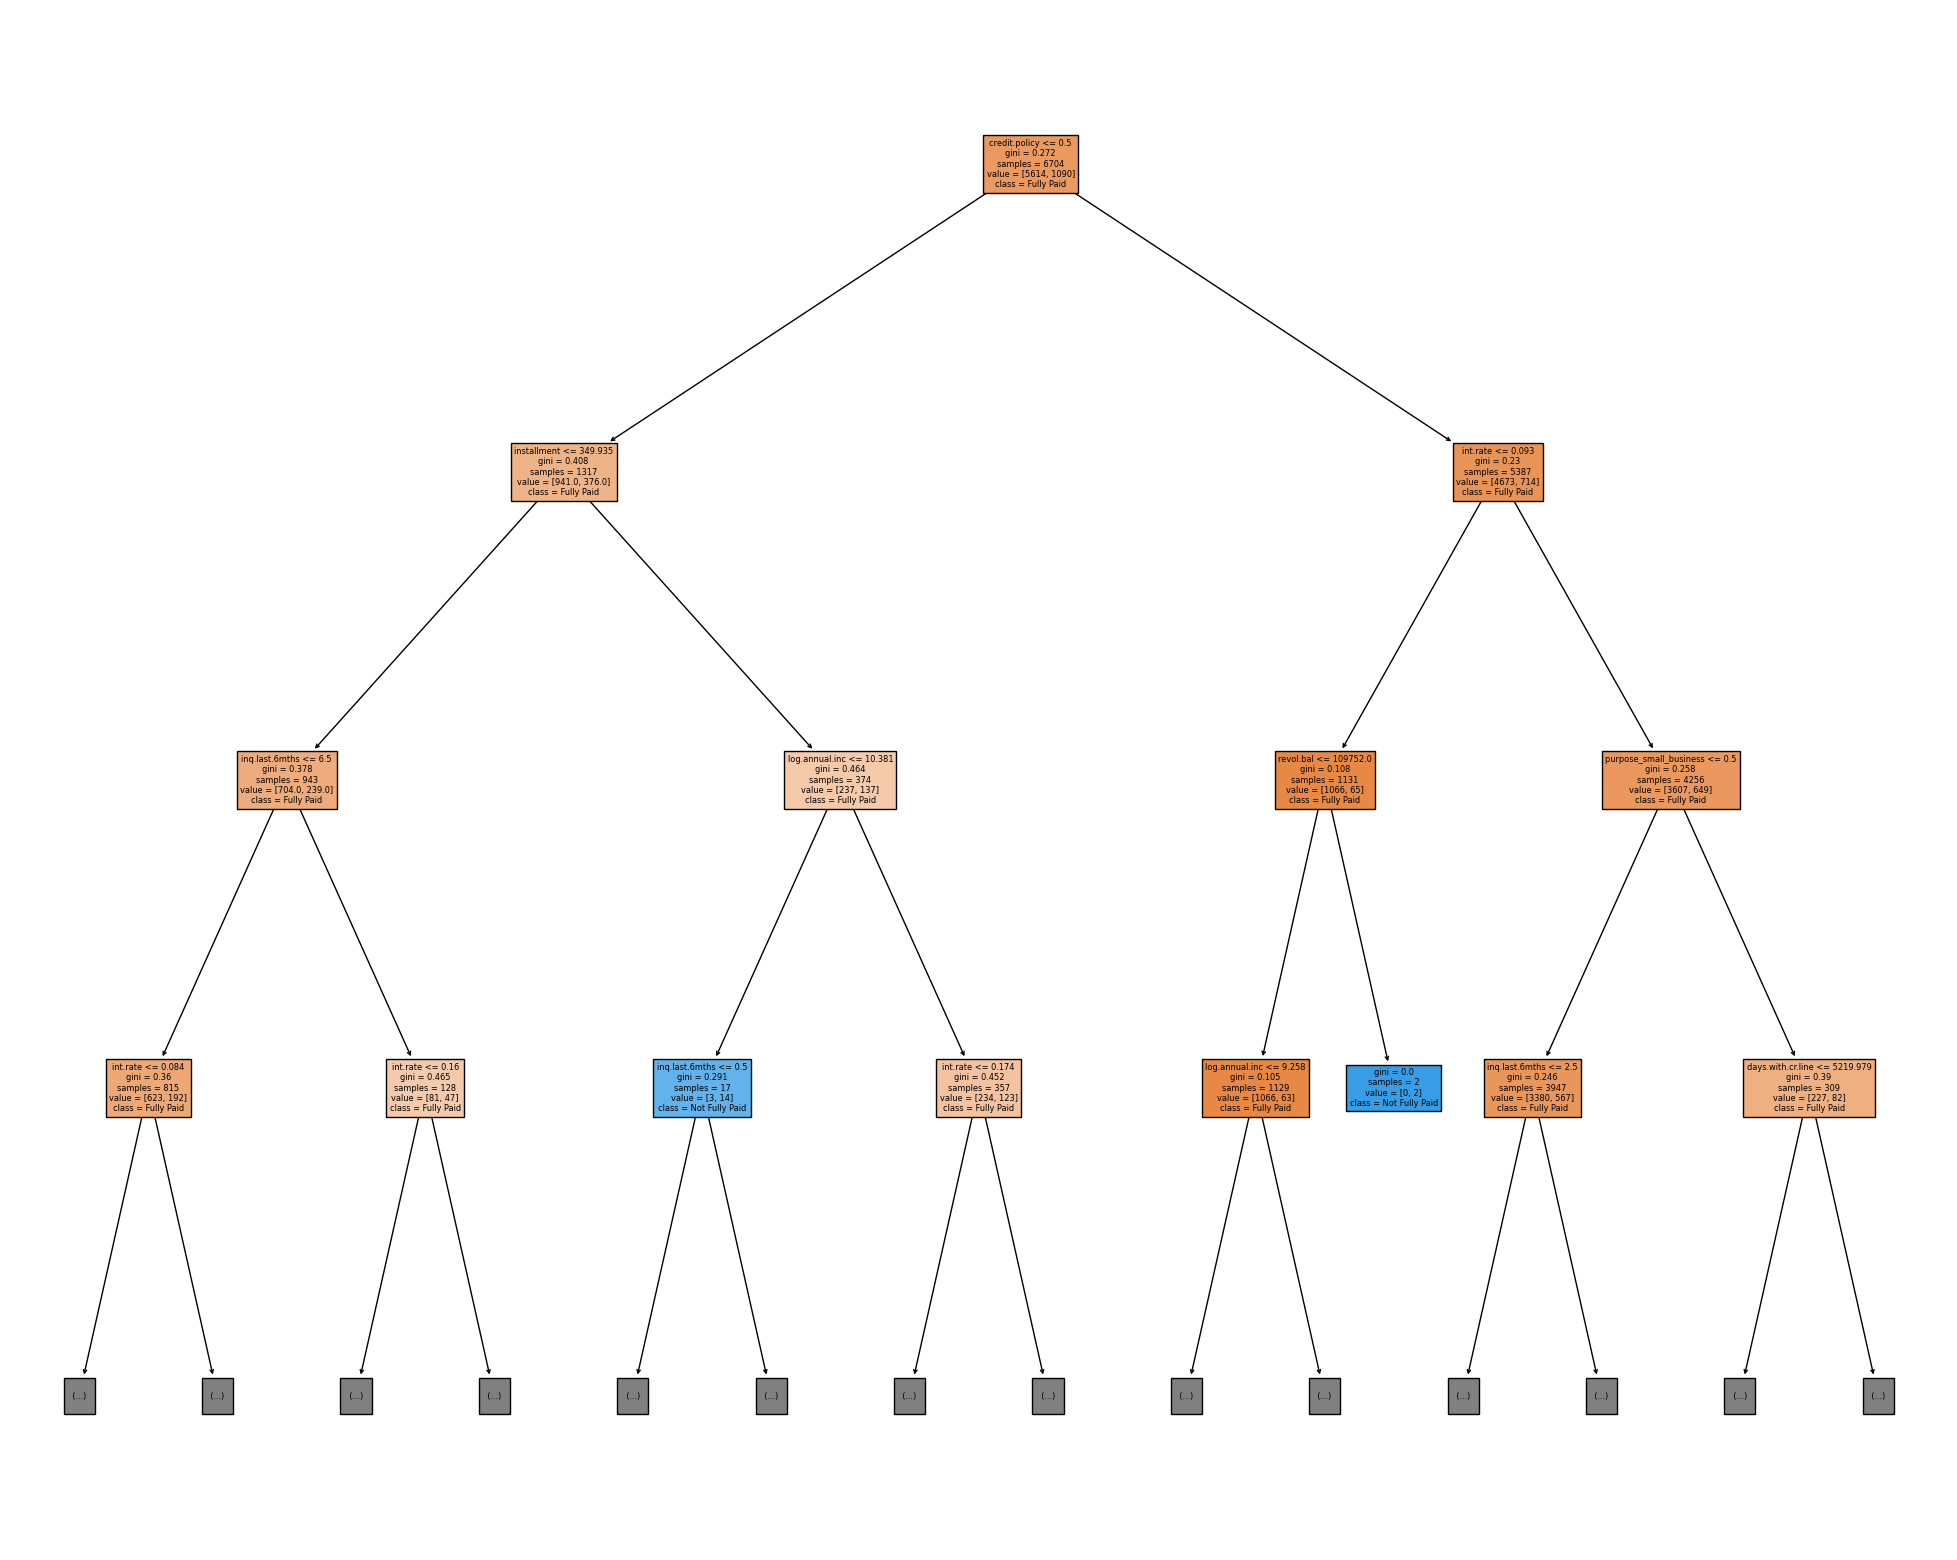

In [18]:
from sklearn import tree

feature_names = X.columns.tolist()
target_name = df.columns[-1]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=feature_names,  
                   class_names=['Fully Paid', 'Not Fully Paid'],
                   filled=True,
                   max_depth=3)
plt.savefig('decision tree.png', bbox_inches = 'tight')



In [19]:
feature_names = X.columns[:-1].tolist()
target_name = df.columns[-1]

from sklearn import tree

text_representation = tree.export_text(dtree)
print(text_representation)

with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_2 <= 349.93
|   |   |--- feature_9 <= 6.50
|   |   |   |--- feature_1 <= 0.08
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.08
|   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |--- feature_8 <= 50.95
|   |   |   |   |   |   |--- feature_8 <= 1.35
|   |   |   |   |   |   |   |--- feature_4 <= 6.54
|   |   |   |   |   |   |   |   |--- feature_6 <= 1890.02
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 4.25
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 8.61
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  8.61
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_4 >  4.25
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_6 >  1890.02
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- fea